# Revised Project questions

**Our project aims to utilize different Machine Learning algorithms to predict the status of a flight (primarily whether it will be delayed, canceled, or on time) before it shows up on the departure boards.**

**After the Exploratory data analysis, we decided to trimmed down our research questions as follow:** 
1. Is it possible that we can predict whether a flight will be delayed or canceled before it comes up on departure boards?
2. Are there certain key predictors that can help you avoid picking a flight that will be delayed or canceled?


# Exploratory Data Analysis

## GETTING THE DATASET

**First, we import the three separate datasets. Our primary sources for analysis will be the flights data, while airports and airlines serve as data dictionaries of sorts to understand the flight data**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:

filename = pd.read_csv('/Users/lai/Documents/Learning/MSDA/SPRING22/CAP5610/Assignment/FinalProject/Possible_Dataset/archive/flights.csv')
filename2 = pd.read_csv('/Users/lai/Documents/Learning/MSDA/SPRING22/CAP5610/Assignment/FinalProject/Possible_Dataset/archive/airlines.csv')
filename3 = pd.read_csv('/Users/lai/Documents/Learning/MSDA/SPRING22/CAP5610/Assignment/FinalProject/Possible_Dataset/archive/airports.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dfflights=filename
dfairlines=filename2
dfairports=filename3

In [4]:
# Joins the origin latitudes and longitudes
dfairports = dfairports[["IATA_CODE","LATITUDE","LONGITUDE"]]
dfairports = dfairports.rename(columns={"IATA_CODE":"ORIGIN_AIRPORT"})
dfflights = pd.merge(dfflights,dfairports,how="left",on="ORIGIN_AIRPORT")
dfflights = dfflights.rename(columns={"LATITUDE":"ORIGIN_LAT","LONGITUDE":"ORIGIN_LONG"})

In [5]:
# Joins the destination latitudes and longitudes
dfairports = dfairports.rename(columns={"ORIGIN_AIRPORT":"DESTINATION_AIRPORT"})
dfflights = pd.merge(dfflights,dfairports,how="left",on="DESTINATION_AIRPORT")
dfflights2 = dfflights.rename(columns={"LATITUDE":"DESTINATION_LAT","LONGITUDE":"DESTINATION_LONG"})

**Next we look at the columns of the dataframe for flights, which shows that we have 31 columns that can be used as features for analysis.**

In [6]:
dfflights.head(200)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,ORIGIN_LAT,ORIGIN_LONG,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,NaN,NaN,61.17432,-149.99619,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,NaN,NaN,NaN,33.94254,-118.40807,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,NaN,NaN,NaN,37.61900,-122.37484,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,NaN,NaN,NaN,NaN,NaN,33.94254,-118.40807,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,NaN,NaN,NaN,NaN,NaN,47.44898,-122.30931,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2015,1,1,4,UA,1224,N87531,SFO,LAX,600,...,NaN,NaN,NaN,NaN,NaN,NaN,37.61900,-122.37484,33.94254,-118.40807
196,2015,1,1,4,UA,1296,N37471,SAT,LAX,600,...,NaN,NaN,NaN,NaN,NaN,NaN,29.53369,-98.46978,33.94254,-118.40807
197,2015,1,1,4,UA,1431,N36207,BOS,LAX,600,...,NaN,NaN,NaN,NaN,NaN,NaN,42.36435,-71.00518,33.94254,-118.40807
198,2015,1,1,4,UA,1637,N33294,SEA,EWR,600,...,NaN,NaN,NaN,NaN,NaN,NaN,47.44898,-122.30931,40.69250,-74.16866


**Our dates appear to be broken up by year, month, and day so we may need to combine these columns down the line further into our analysis. We also have the airport codes and airline codes that match up with the definitions in our other two data sets.Our most important columns will likely be arrival time and arrival delay as well as cancelled. Notably, there are several columns for delays as well that specify the reason for the delays, which could be relevant to making predictions for future flights (i.e. if a flight was cancelled each time the past 5 years on April 10th because of rain, our algorithm may predict cancellation of this flight next year because of this factor amongst other factors).**

In [7]:
dfairlines.head(100)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [8]:
dfairports.head(10000)

,DESTINATION_AIRPORT,LATITUDE,LONGITUDE
0,ABE,40.65236,-75.44040
1,ABI,32.41132,-99.68190
2,ABQ,35.04022,-106.60919
3,ABR,45.44906,-98.42183
4,ABY,31.53552,-84.19447
...,...,...,...
317,WRG,56.48433,-132.36982
318,WYS,44.68840,-111.11764
319,XNA,36.28187,-94.30681
320,YAK,59.50336,-139.66023


**Looking at our data shape, we have 5,819,079 flights to work with, which gives us a robust set of data for analysis. We also count the values of the airline column below:**

In [9]:
dfflights.shape


(5819079, 35)

In [10]:
dfairlines.shape


(14, 2)

In [11]:
dfairports.shape

(322, 3)

Here we see WN (which in our data for airlines is Southwest) has the most flight data compared to other airlines, followed by DL (Delta Airlines).

In [12]:
dfflights.value_counts('AIRLINE')

AIRLINE
WN    1261855
DL     875881
AA     725984
OO     588353
EV     571977
UA     515723
MQ     294632
B6     267048
US     198715
AS     172521
NK     117379
F9      90836
HA      76272
VX      61903
dtype: int64

**Doing the same with regard to airports, we can see that most flights originated from ATL. We also see that we have some curious numeric values that don't match our airport data near the bottom, which we may have to drop or find a source for.**

In [13]:
dfflights.value_counts('ORIGIN_AIRPORT')

ORIGIN_AIRPORT
ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13964         1
14025         1
14222         1
15497         1
12265         1
Length: 930, dtype: int64

In [14]:
dfflights.value_counts('DESTINATION_AIRPORT')

DESTINATION_AIRPORT
ATL      346904
ORD      285906
DFW      239582
DEN      196010
LAX      194696
          ...  
12265         1
14025         1
13459         1
15497         1
13964         1
Length: 930, dtype: int64

**We also see that our destination airports line up exactly with the origin airports, meaning these airports overall are the ones with the most traffic.**

In [15]:
# The number of flights which were diverted
dfflights.value_counts('DIVERTED')

DIVERTED
0    5803892
1      15187
dtype: int64

In [16]:
dfflights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

## Data Visualisation

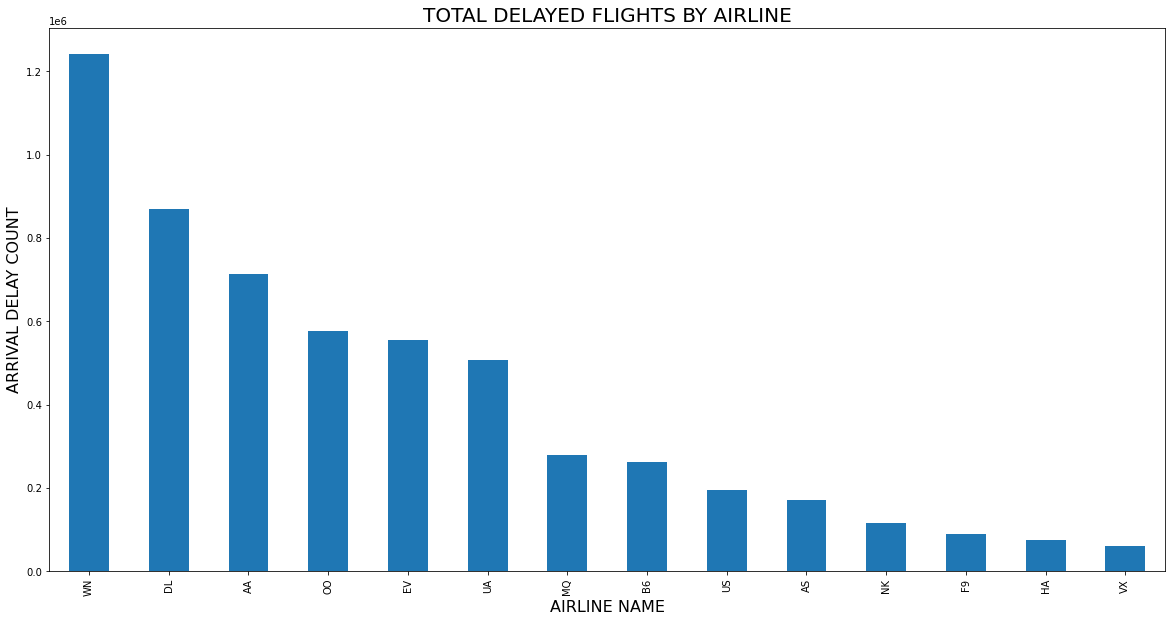

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(20, 10))
dfflights.groupby('AIRLINE').ARRIVAL_DELAY.count().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('ARRIVAL DELAY COUNT', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

**Looking at Arrival Delay andAirlines, we create a plot and can see that Southwest has the longest Arrival Delay by sum.**

**However, when grouping by count (i.e. the number of delays rather than sum of length of delays) we see that while Southwest is still the highest, Delta has moved to second, however, since these airlines are the biggest and thus have the most flights, this does not necessarily mean that these airlines have longer delays. For that we will need to see the count of delays as well as the mean:**

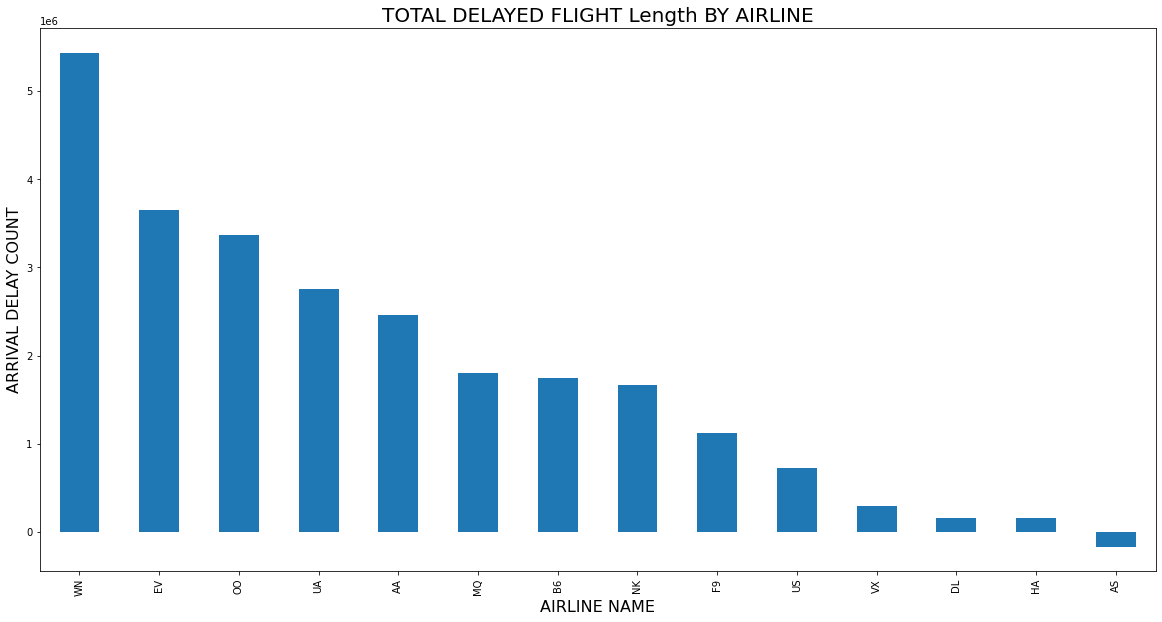

In [18]:
plt.figure(figsize=(20, 10))
dfflights.groupby('AIRLINE').ARRIVAL_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHT Length BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('ARRIVAL DELAY COUNT', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

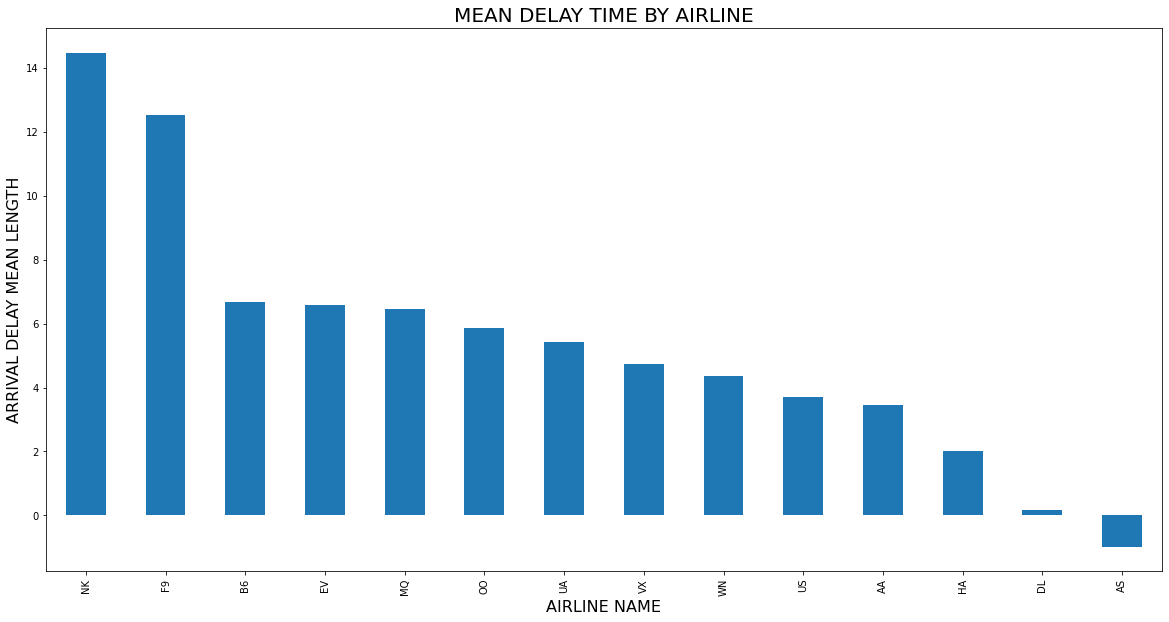

In [19]:
plt.figure(figsize=(20, 10))
dfflights.groupby('AIRLINE').ARRIVAL_DELAY.mean().sort_values(ascending=False).plot.bar()
plt.title('MEAN DELAY TIME BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('ARRIVAL DELAY MEAN LENGTH', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

**Doing the same with mean Arrival Delay Length, we see that NK airlines has the longest average arrival delay, whence WN is fairly low.**

**This means that these airlines, while not having the most delays (as airlines with more flights overall will have more delays) have the highest average flight delay. We find similar results when looking at mean departure delay and departure delay count, though on average it looks like mean departure delay is longer than mean arrival delay:**

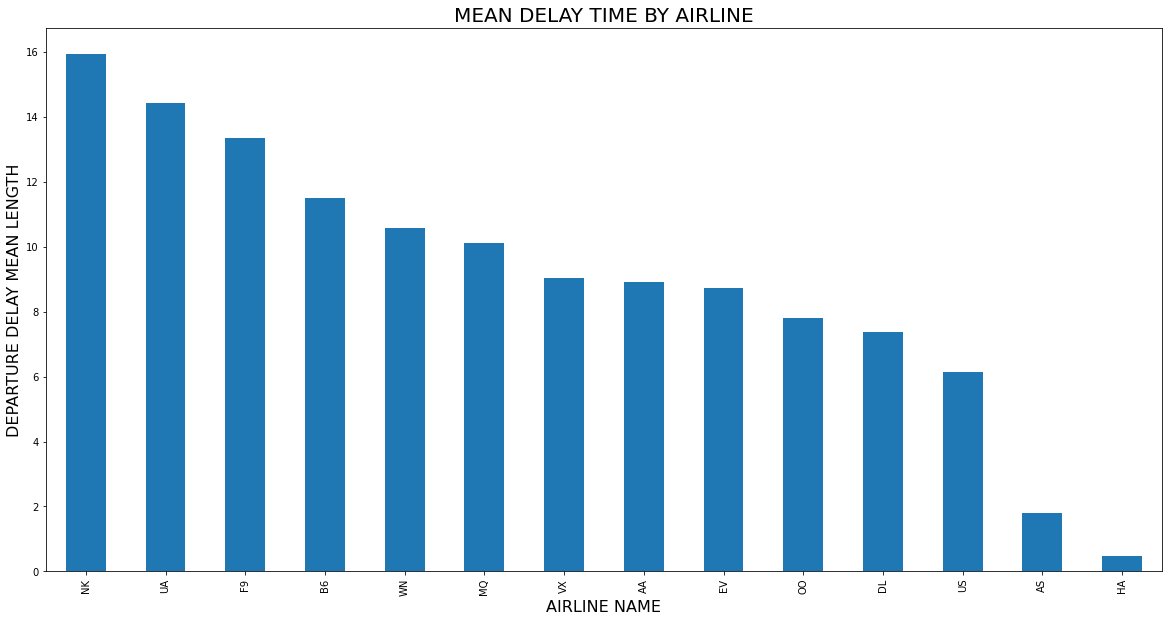

In [20]:
plt.figure(figsize=(20, 10))
dfflights.groupby('AIRLINE').DEPARTURE_DELAY.mean().sort_values(ascending=False).plot.bar()
plt.title('MEAN DELAY TIME BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('DEPARTURE DELAY MEAN LENGTH', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

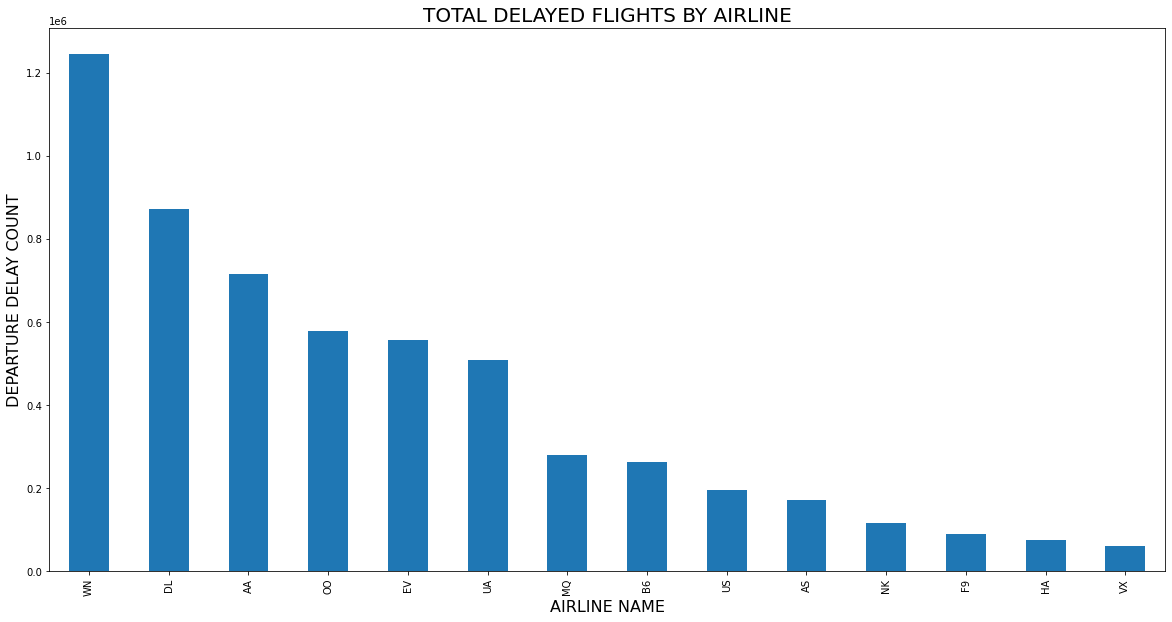

In [21]:
plt.figure(figsize=(20, 10))
dfflights.groupby('AIRLINE').DEPARTURE_DELAY.count().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE NAME', fontsize=16)
plt.ylabel('DEPARTURE DELAY COUNT', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

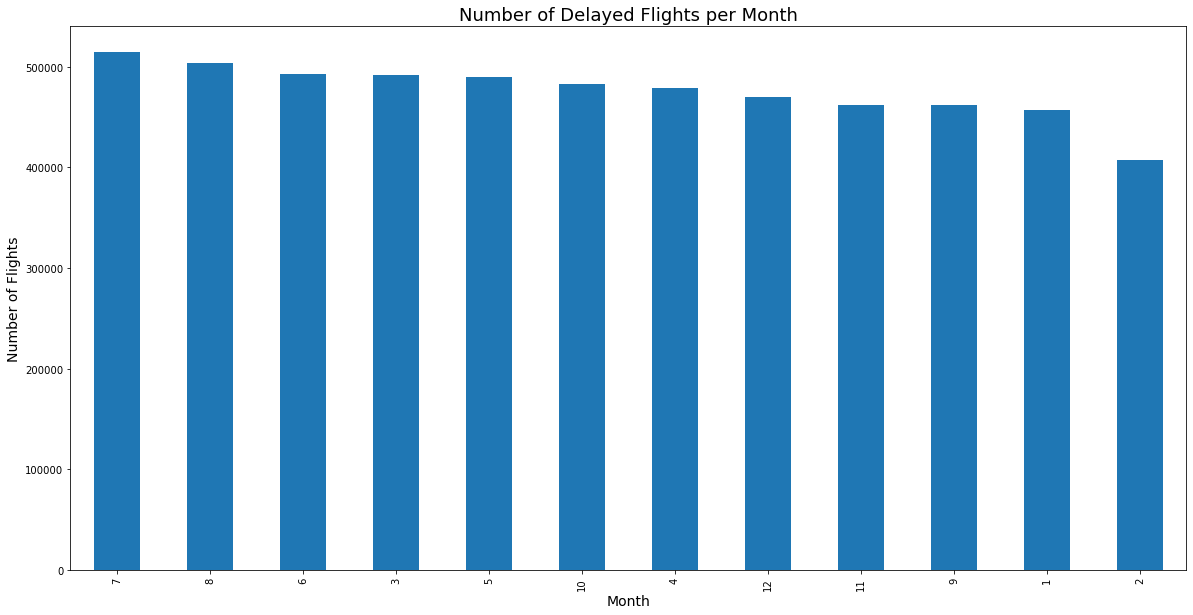

In [22]:
plt.figure(figsize=(20, 10))
dfflights.groupby('MONTH').ARRIVAL_DELAY.count().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**Looking at arrival delayed flights by month we can see that July has the highest count of delayed flights, followed closely by August and March.**

**Running with mean Arrival Delay we see however that on average the longest Arrival Delays are in June, followed by February:**

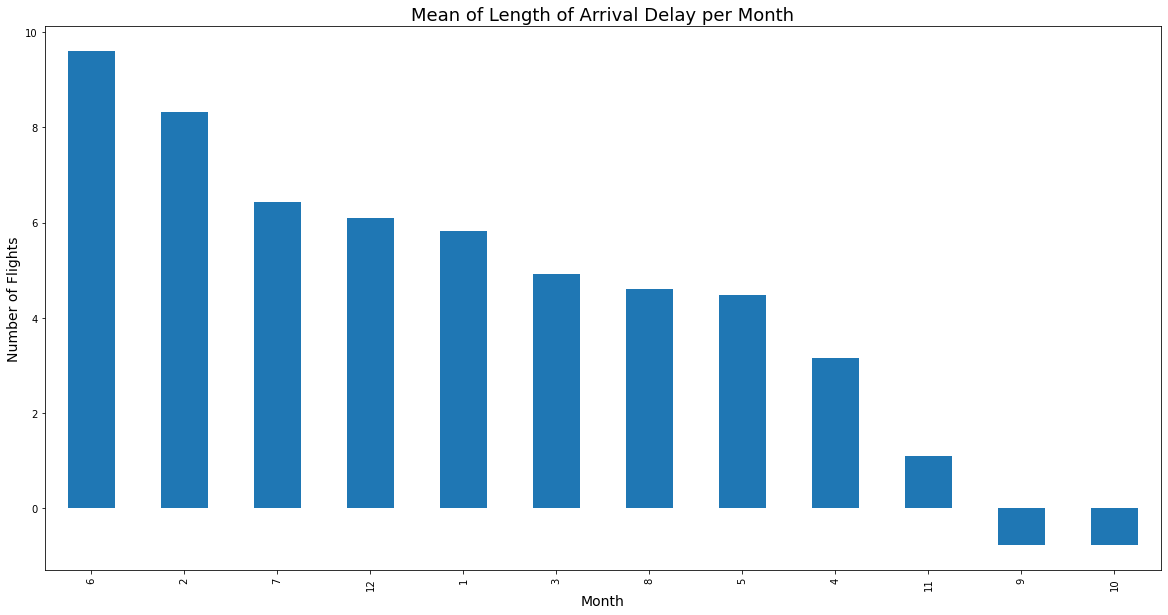

In [23]:
plt.figure(figsize=(20, 10))
dfflights.groupby('MONTH').ARRIVAL_DELAY.mean().sort_values(ascending=False).plot.bar()
plt.title('Mean of Length of Arrival Delay per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**Doing the same with Departure Delays, we see that June also has the longest mean Departure Delays followed by December:**

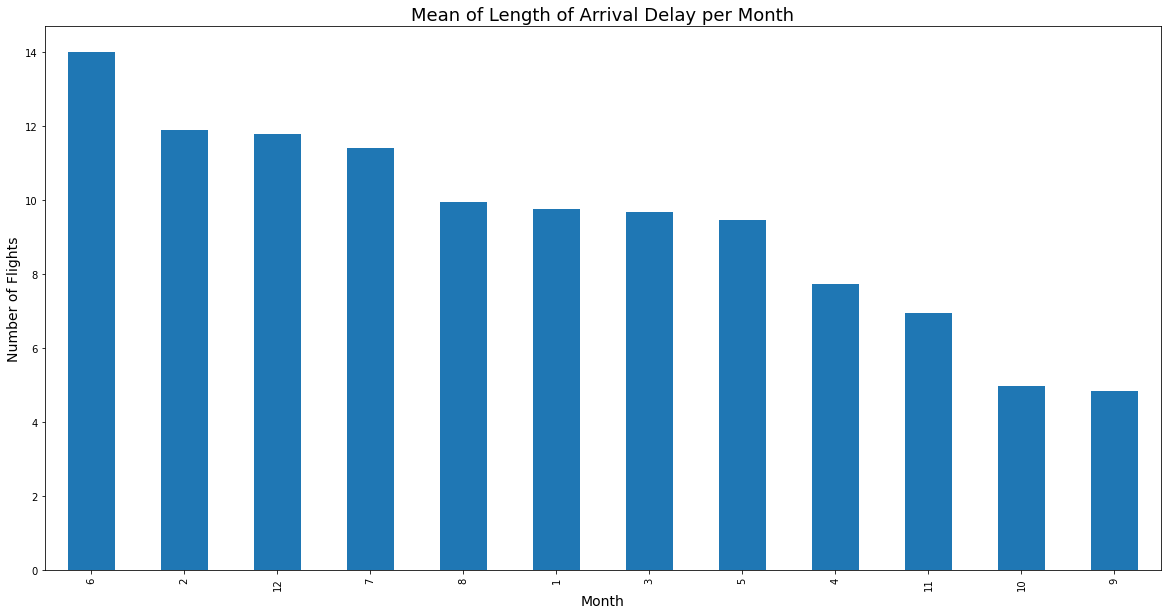

In [24]:
plt.figure(figsize=(20, 10))
dfflights.groupby('MONTH').DEPARTURE_DELAY.mean().sort_values(ascending=False).plot.bar()
plt.title('Mean of Length of Arrival Delay per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**While looking at amount of Departure Delays gives us July and August as with the Arrival Delays**

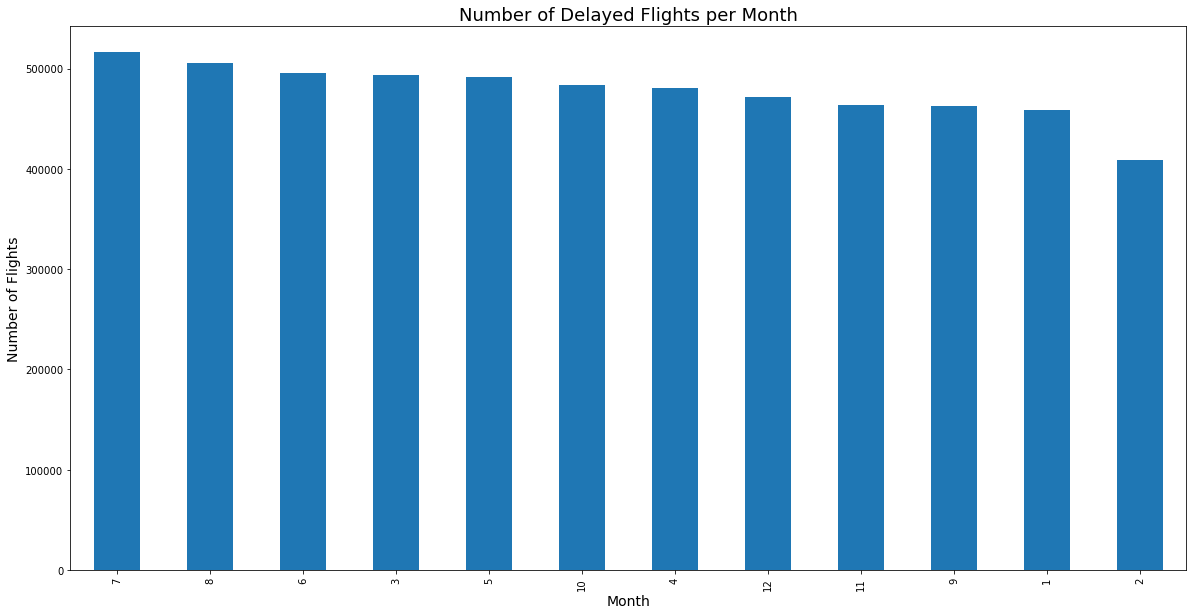

In [25]:
plt.figure(figsize=(20, 10))
dfflights.groupby('MONTH').DEPARTURE_DELAY.count().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

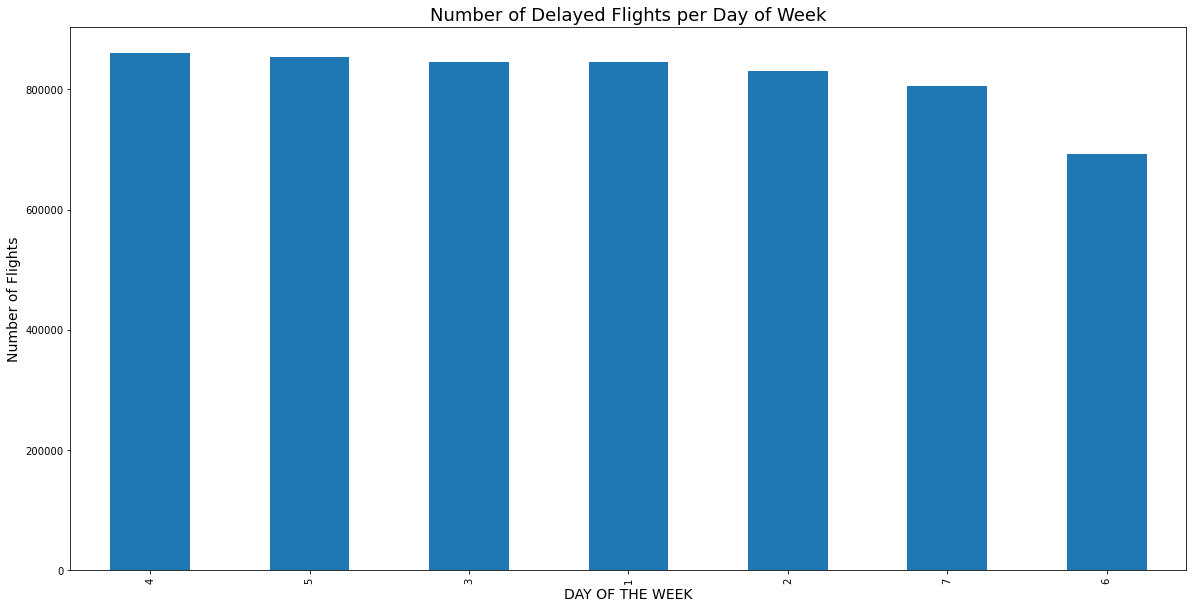

In [26]:
plt.figure(figsize=(20, 10))
dfflights.groupby('DAY_OF_WEEK').DEPARTURE_DELAY.count().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Day of Week', fontsize=18)
plt.xlabel('DAY OF THE WEEK', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**Number of Delays per day of the week is fairly uniform, with Thursdays and Sundays having the most delayed flights (Departure Delays)**

**As well as similar results with Arrival Delays**


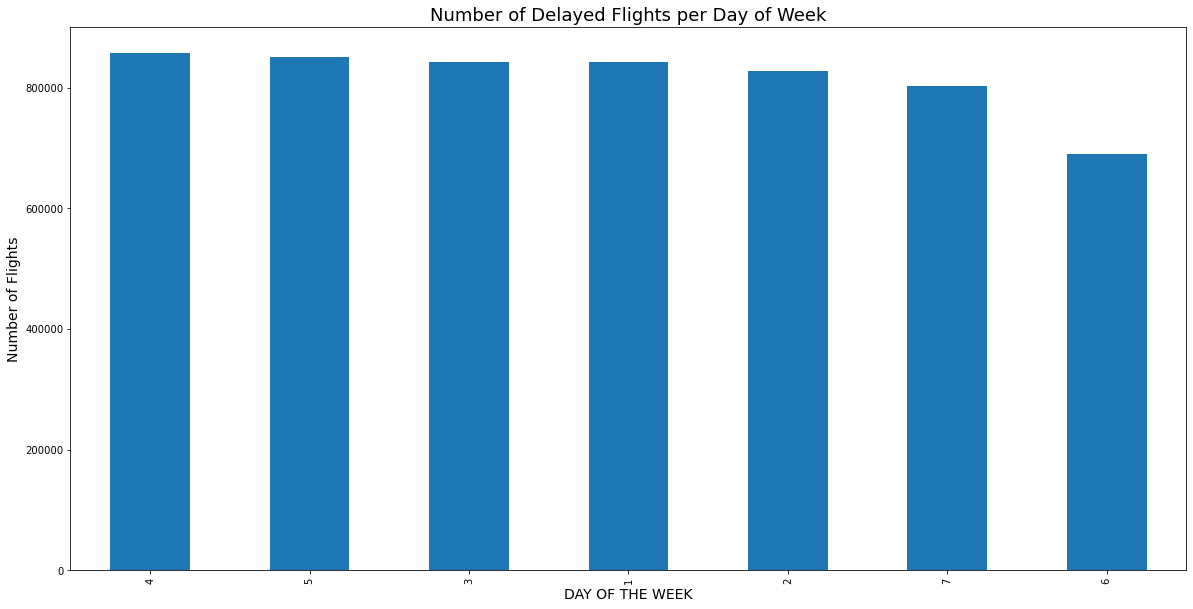

In [27]:
plt.figure(figsize=(20, 10))
dfflights.groupby('DAY_OF_WEEK').ARRIVAL_DELAY.count().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Day of Week', fontsize=18)
plt.xlabel('DAY OF THE WEEK', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**While with average length of delay,, Sunday is highest with thursday close behind (Arrival Delay)**

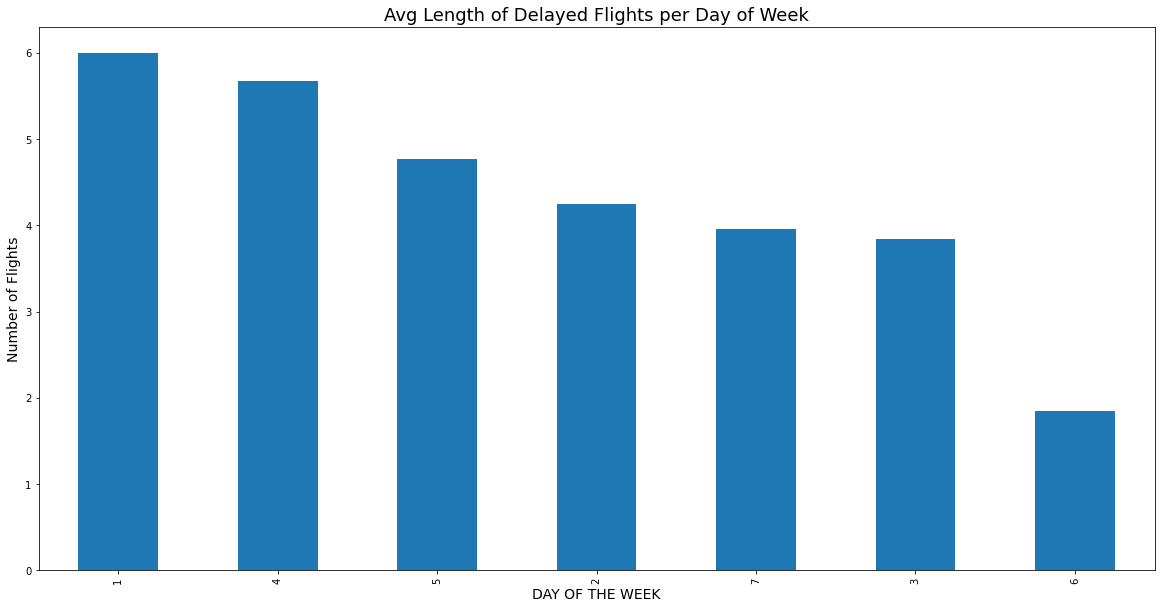

In [28]:
plt.figure(figsize=(20, 10))
dfflights.groupby('DAY_OF_WEEK').ARRIVAL_DELAY.mean().sort_values(ascending=False).plot.bar()
plt.title('Avg Length of Delayed Flights per Day of Week', fontsize=18)
plt.xlabel('DAY OF THE WEEK', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**Departure delay length is fairly similar:**


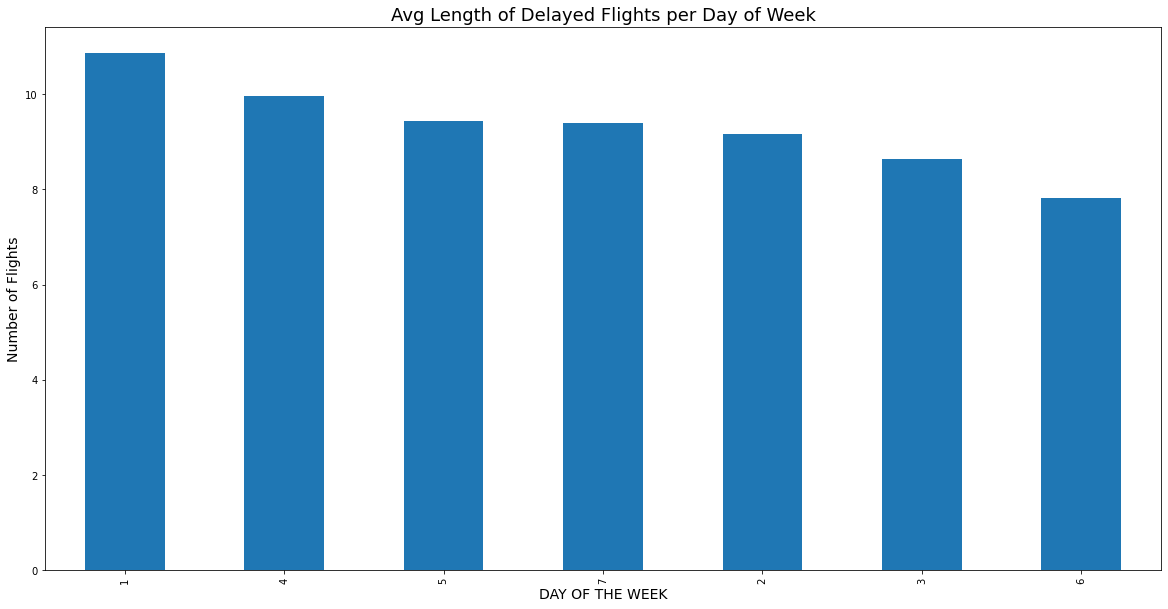

In [29]:
plt.figure(figsize=(20, 10))
dfflights.groupby('DAY_OF_WEEK').DEPARTURE_DELAY.mean().sort_values(ascending=False).plot.bar()
plt.title('Avg Length of Delayed Flights per Day of Week', fontsize=18)
plt.xlabel('DAY OF THE WEEK', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

**We also plot average arrival and departure delays by airline together:**


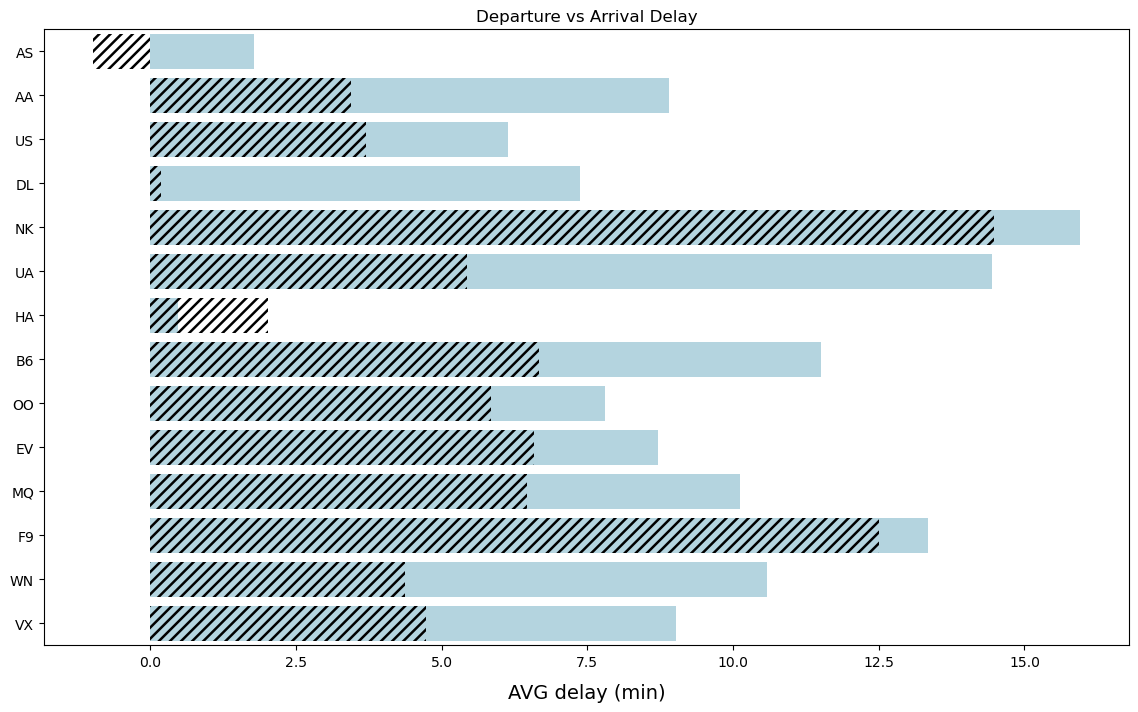

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(14,8))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=dfflights, color="lightblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=dfflights, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('AVG delay (min)', fontsize=14, labelpad=10);

**Through this we can confirm that average departure delays are longer than average arrival delays, and that NK and UA (Spirit and United Airlines respectively) have the highest average delay time for Departures while NK and F9 (Frontier Airlines) have the longest average Arrival delay.**

# DATA PRE-PROCESSING

**First, we eleminated inrelevant features for modeling, including: 'YEAR','AIRLINE', 'SECURITY_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','LATE_AIRCRAFT_DELAY','ARRIVAL_TIME', 'DEPARTURE_DELAY','AIRLINE_DELAY','DEPARTURE_TIME',
'CANCELLATION_REASON','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','TAXI_OUT', 'WHEELS_ON', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'DIVERTED','CANCELLED'**

In [31]:
dfflights = dfflights.drop(['YEAR','AIRLINE', 'SECURITY_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','LATE_AIRCRAFT_DELAY','ARRIVAL_TIME', 'DEPARTURE_DELAY','AIRLINE_DELAY','DEPARTURE_TIME',
'CANCELLATION_REASON','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','TAXI_OUT', 'WHEELS_ON', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'TAXI_IN', 'DIVERTED','CANCELLED'], axis=1)



In [32]:
dfflights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY',
       'ORIGIN_LAT', 'ORIGIN_LONG', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

<AxesSubplot:>

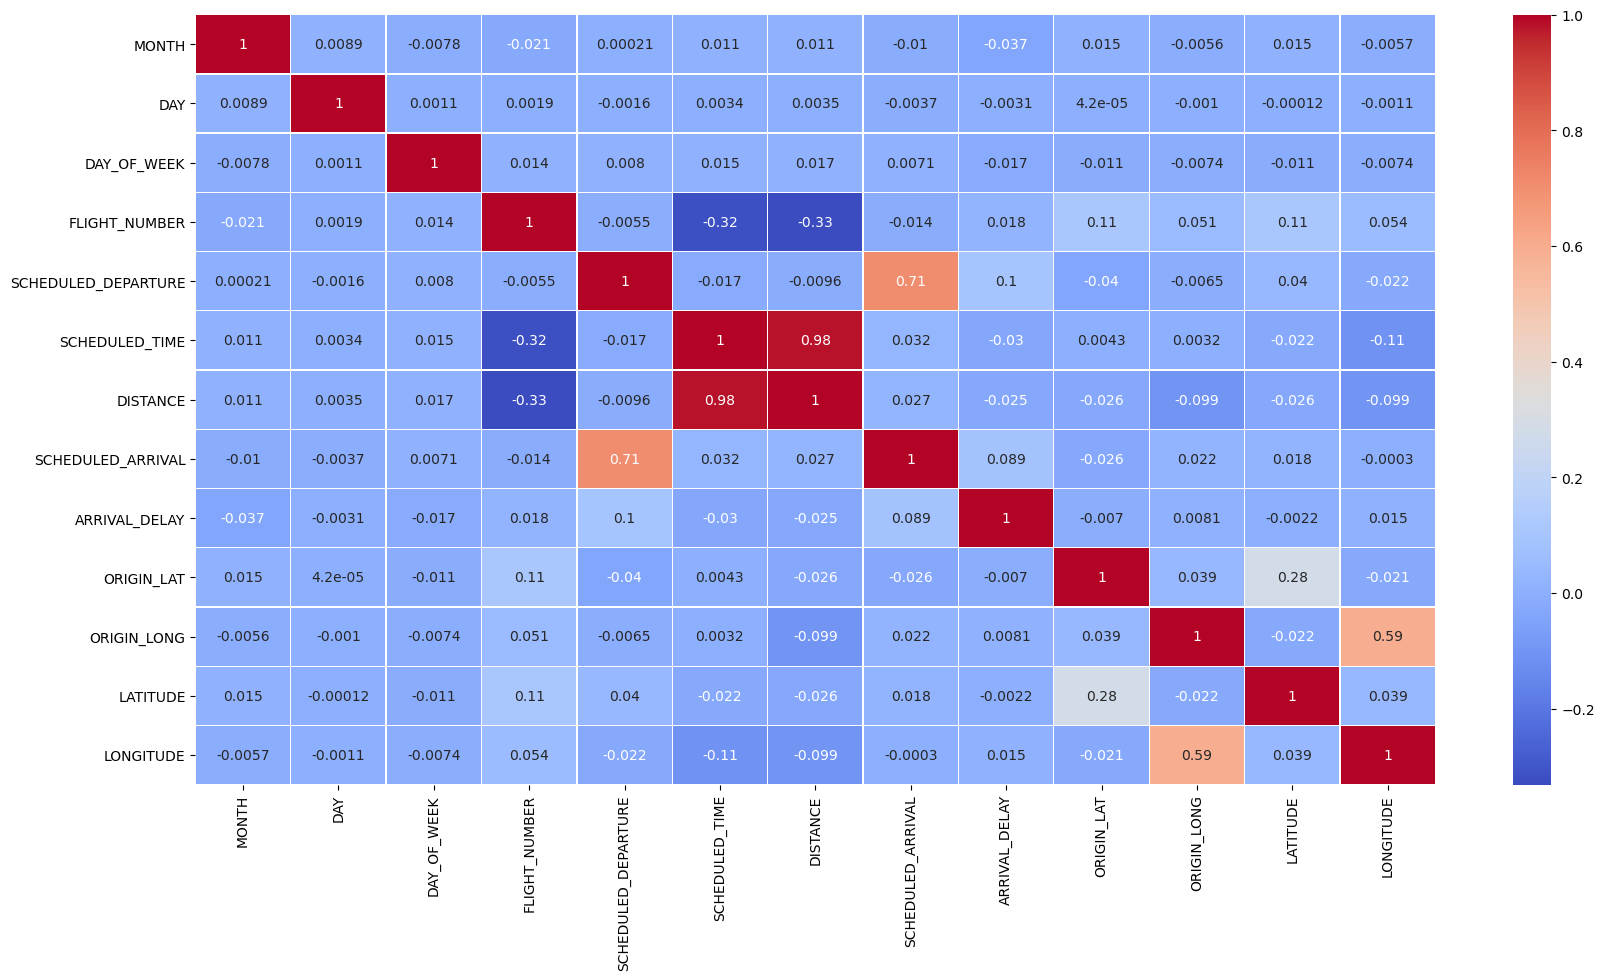

In [33]:
plt.figure(figsize=(20,10))
sb.heatmap(dfflights.corr(), annot=True, cmap='coolwarm', linewidths=0.2)

In [34]:
dfflights.corr()['ARRIVAL_DELAY'][:].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
SCHEDULED_DEPARTURE    0.100220
SCHEDULED_ARRIVAL      0.088824
FLIGHT_NUMBER          0.018419
LONGITUDE              0.014828
ORIGIN_LONG            0.008051
LATITUDE              -0.002217
DAY                   -0.003097
ORIGIN_LAT            -0.007034
DAY_OF_WEEK           -0.017027
DISTANCE              -0.025444
SCHEDULED_TIME        -0.030029
MONTH                 -0.036793
Name: ARRIVAL_DELAY, dtype: float64

**Second, we identified the NaN values within the dataset. It can be seen that NaN value presented a Delay when no delay was present. Since this means there was no delay in these categories, we can safely set NaN to 0.**

In [35]:
#Identify NaN values 

dfflights.isna().sum()

MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
FLIGHT_NUMBER               0
SCHEDULED_DEPARTURE         0
SCHEDULED_TIME              6
DISTANCE                    0
SCHEDULED_ARRIVAL           0
ARRIVAL_DELAY          105071
ORIGIN_LAT             490770
ORIGIN_LONG            490770
LATITUDE               490775
LONGITUDE              490775
dtype: int64

In [36]:
#Replacing NaN values with 0
dfflights = dfflights.fillna(0)
dfflights.isna().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
FLIGHT_NUMBER          0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         0
DISTANCE               0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
ORIGIN_LAT             0
ORIGIN_LONG            0
LATITUDE               0
LONGITUDE              0
dtype: int64

In [37]:
dfflights

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,ORIGIN_LAT,ORIGIN_LONG,LATITUDE,LONGITUDE
0,1,1,4,98,5,205.0,1448,430,-22.0,61.17432,-149.99619,47.44898,-122.30931
1,1,1,4,2336,10,280.0,2330,750,-9.0,33.94254,-118.40807,26.68316,-80.09559
2,1,1,4,840,20,286.0,2296,806,5.0,37.61900,-122.37484,35.21401,-80.94313
3,1,1,4,258,20,285.0,2342,805,-9.0,33.94254,-118.40807,25.79325,-80.29056
4,1,1,4,135,25,235.0,1448,320,-21.0,47.44898,-122.30931,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,688,2359,320.0,2611,819,-26.0,33.94254,-118.40807,42.36435,-71.00518
5819075,12,31,4,745,2359,227.0,1617,446,-16.0,40.63975,-73.77893,18.00830,-66.56301
5819076,12,31,4,1503,2359,221.0,1598,440,-8.0,40.63975,-73.77893,18.43942,-66.00183
5819077,12,31,4,333,2359,161.0,1189,340,-10.0,28.42889,-81.31603,18.43942,-66.00183


**Since there was no dependent variable which serves as the results wheather flights is delayed or not, we decided to engineered a new feature called "FLIGHT_STATUS". In this column there were only two values, 0 for flights that arrive either earlier or on time, and 1 for flight that were delayed**

In [38]:
#Adding feature 'FLIGHT_STATUS'
result = []
for row in dfflights['ARRIVAL_DELAY']:
    if row > 0:
        result.append(1)
    else:
        result.append(0)
        
dfflights['FLIGHT_STATUS'] = result

**The 'ARRIVAL_DELAY' will be dropped out as we had created 'FLIGHT_STATUS' as the result feature**

In [39]:
dfflights = dfflights.drop(['ARRIVAL_DELAY'], axis=1)

In [40]:
dfflights

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ORIGIN_LAT,ORIGIN_LONG,LATITUDE,LONGITUDE,FLIGHT_STATUS
0,1,1,4,98,5,205.0,1448,430,61.17432,-149.99619,47.44898,-122.30931,0
1,1,1,4,2336,10,280.0,2330,750,33.94254,-118.40807,26.68316,-80.09559,0
2,1,1,4,840,20,286.0,2296,806,37.61900,-122.37484,35.21401,-80.94313,1
3,1,1,4,258,20,285.0,2342,805,33.94254,-118.40807,25.79325,-80.29056,0
4,1,1,4,135,25,235.0,1448,320,47.44898,-122.30931,61.17432,-149.99619,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,688,2359,320.0,2611,819,33.94254,-118.40807,42.36435,-71.00518,0
5819075,12,31,4,745,2359,227.0,1617,446,40.63975,-73.77893,18.00830,-66.56301,0
5819076,12,31,4,1503,2359,221.0,1598,440,40.63975,-73.77893,18.43942,-66.00183,0
5819077,12,31,4,333,2359,161.0,1189,340,28.42889,-81.31603,18.43942,-66.00183,0


In [41]:
dfflights['FLIGHT_STATUS'].value_counts()

0    3732183
1    2086896
Name: FLIGHT_STATUS, dtype: int64

**It can be seen that the dataset is imbalance. We will perform over-sampling before creating the models**

# BUILDING MODEL

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [43]:
#Define X and Y

data = dfflights.values
X = data [:, :-1]
Y = data [:, -1]


In [44]:
#Features scalling

scaler = StandardScaler()
scaler.fit_transform(X,Y)

array([[-1.62228008, -1.67412998,  0.03673429, ..., -1.97233116,
         1.18929892, -1.09943593],
       [-1.62228008, -1.67412998,  0.03673429, ..., -0.97642767,
        -0.58731493,  0.23147174],
       [-1.62228008, -1.67412998,  0.03673429, ..., -1.10149115,
         0.14253953,  0.20475063],
       ...,
       [ 1.6081337 ,  1.74139441,  0.03673429, ...,  0.43063032,
        -1.29260578,  0.67581764],
       [ 1.6081337 ,  1.74139441,  0.03673429, ...,  0.19300224,
        -1.29260578,  0.67581764],
       [ 1.6081337 ,  1.74139441,  0.03673429, ...,  0.43063032,
        -1.28786262,  0.64026652]])

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [46]:
#Perform Over-sampling since the dataset is imbalance

ros = RandomOverSampler (sampling_strategy=1)
x_train, y_train = ros.fit_resample(X_train,Y_train)
print(sorted(Counter(y_train).items()),y_train.shape)

[(0.0, 2612228), (1.0, 2612228)] (5224456,)


**Baseline model: Decision Tree Classfier**

In [47]:
#Baseline model: Decision Tree Classifier
model0 = DecisionTreeClassifier()
baseline = model0.fit(x_train,y_train)
baseline_prob = baseline.predict(X_test)
baseline_auc = roc_auc_score(Y_test, baseline_prob)
baseline_auc

0.5898314727984268

In [48]:
accuracy_score(Y_test, baseline_prob)

0.6219282085828001

**Model 2: Linear Regression**

In [49]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(solver='liblinear', max_iter=150)
model2 = model2.fit(x_train,y_train)
model2_prob = model2.predict(X_test)
model2_auc = roc_auc_score(Y_test, model2_prob)
model2_auc

0.5687844264813429

In [50]:
accuracy_score(Y_test, model2_prob)

0.5666336717602554

**Model 3: Random Forest**

In [51]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, verbose=3, n_jobs=-1)
model3 = model3.fit(x_train, y_train)
model3_prob = model3.predict(X_test)
model3_auc = roc_auc_score(Y_test, model3_prob)
model3_auc

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100

building tree 6 of 100

building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100building tree 20 of 100

building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100building tree 29 of 100

building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100building tree 46 of 100

building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100building tree 52 of 100

building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.4min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    8.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   53.2s finished


0.6340885546876481

In [52]:
model3_auc

0.6340885546876481

In [53]:
accuracy_score(Y_test, model3_prob)

0.6735480522694309

**The Ensemble Model**

In [57]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('DTC', model0), ('LR', model2), ('RF', model3)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
model = ensemble.fit(x_train,y_train)
model_prob = model.predict(X_test)
model_auc = roc_auc_score(Y_test, model_prob)
model_auc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   53.2s finished


0.6273877851872666

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, model_prob)

0.65884240578694

In [67]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, model_prob)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74   1119955
         1.0       0.52      0.52      0.52    625769

    accuracy                           0.66   1745724
   macro avg       0.63      0.63      0.63   1745724
weighted avg       0.66      0.66      0.66   1745724



In [54]:
from numpy import hstack
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('rf', RandomForestClassifier()))
    models.append(('dtc', DecisionTreeClassifier()))
    return models

In [55]:
def fit_ensemble(models, x_train, X_test, y_train, Y_test):
    meta_X = list()
    for name, model in models:
        model.fit(x_train, y_train)
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    blender = LogisticRegression()
    blender.fit(meta_X, Y_test)
    return blender
 
def predict_ensemble(models, blender, X_test):
    meta_X = list()
    for name, model in models:
        yhat = model.predict(X_test)
        yhat = yhat.reshape(len(yhat), 1)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)
    return blender.predict(meta_X)

In [56]:
models = get_models()
blender = fit_ensemble(models, x_train, X_test, y_train, Y_test)
yhat = predict_ensemble(models, blender, X_test)
score = accuracy_score(Y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Blending Accuracy: 67.936


In [66]:
auc_score = roc_auc_score(Y_test, yhat)
auc_score

0.6260679408818509

In [68]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, yhat)
print(report)

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.77   1119955
         1.0       0.57      0.44      0.49    625769

    accuracy                           0.68   1745724
   macro avg       0.65      0.63      0.63   1745724
weighted avg       0.67      0.68      0.67   1745724

